In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.pylab import rcParams
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#from statistics import std

In [17]:
added_stats = pd.read_csv(r'D:\Szakdolgozat_data\Features_jupyter\all_stats_added.csv')

In [2]:
#list(added_stats.columns)

In [30]:
added_stats['shot_value'] = added_stats['SHOT_TYPE'].astype(str).str[0]
added_stats['points_scored'] = added_stats['shot_value'].astype('int')
added_stats.loc[(added_stats['SHOT_MADE_FLAG'] ==0),'points_scored']=0

added_stats[['SHOT_MADE_FLAG','SHOT_TYPE','SHOT_DISTANCE','shot_value','points_scored']]

,SHOT_MADE_FLAG,SHOT_TYPE,SHOT_DISTANCE,shot_value,points_scored
0,1,2PT Field Goal,13,2,2
1,1,2PT Field Goal,12,2,2
2,1,2PT Field Goal,8,2,2
3,0,2PT Field Goal,20,2,0
4,0,2PT Field Goal,8,2,0
...,...,...,...,...,...
5535,1,3PT Field Goal,24,3,3
5536,1,2PT Field Goal,2,2,2
5537,1,2PT Field Goal,2,2,2
5538,0,3PT Field Goal,28,3,0


In [31]:
added_stats = added_stats.drop(columns=['Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Game_ID','Event_Number','Frame_Number','game_clock_x','shot_clock_x','quarter_x',
'p1_team_id_x','p1_player_id_x','p2_team_id_x','p2_player_id_x','p3_team_id_x','p3_player_id_x','p4_team_id_x','p4_player_id_x','p5_team_id_x','p5_player_id_x','p6_team_id_x','p6_player_id_x','p7_team_id_x','p7_player_id_x','p8_team_id_x','p8_player_id_x','p9_team_id_x','p9_player_id_x','p10_team_id_x','p10_player_id_x',
'game_clock_plus25','shot_clock_plus25','game_clock_plus50','shot_clock_plus50','SHOOTER_ID','SHOOTER_NAME','SHOOTER_TEAM_ID','ACTION_TYPE','SHOT_TYPE','LOC_X',
'LOC_Y','FT%','SECLEFT','game_clock_shot','shot_clock_shot','AVG_DIST_TO_SHOOTER','Ball_handler','On_ball_defender','Screener','Screener_defender','Ball_handler_plus25','On_ball_defender_plus25','Screener_plus25','Screener_defender_plus25','Ball_handler_plus50','On_ball_defender_plus50','Screener_plus50','Screener_defender_plus50','Basket_x','Basket_y','Ball_handler_name','Screener_name','On_ball_defender_name','Screener_defender_name',
 'Name_P1','Minutes Played_P1','FT%_P1','Name_P2','Minutes Played_P2','FT%_P2','Name_P3','Minutes Played_P3','FT%_P3','Name_P4','Minutes Played_P4','FT%_P4','Name_P5','Minutes Played_P5','FT%_P5','Name_P6','Minutes Played_P6','FT%_P6','Name_P7','Minutes Played_P7','FT%_P7','Name_P8','Minutes Played_P8','FT%_P8','Name_P9','Minutes Played_P9','FT%_P9','Name_P10','Minutes Played_P10','FT%_P10','AST%_P1','AST%_P2','AST%_P3','AST%_P4','AST%_P5','AST%_P6','AST%_P7','AST%_P8','AST%_P9','AST%_P10','shot_value'])

In [34]:
no_xy = added_stats.drop(columns = ['b_x_x','b_y_x','p1_x_x','p1_y_x','p2_x_x','p2_y_x','p3_x_x','p3_y_x','p4_x_x','p4_y_x','p5_x_x','p5_y_x','p6_x_x','p6_y_x','p7_x_x','p7_y_x','p8_x_x','p8_y_x','p9_x_x','p9_y_x','p10_x_x','p10_y_x','b_x_plus25','b_y_plus25','p1_x_plus25','p1_y_plus25','p2_x_plus25','p2_y_plus25','p3_x_plus25','p3_y_plus25','p4_x_plus25','p4_y_plus25','p5_x_plus25','p5_y_plus25','p6_x_plus25','p6_y_plus25','p7_x_plus25','p7_y_plus25','p8_x_plus25','p8_y_plus25','p9_x_plus25','p9_y_plus25','p10_x_plus25','p10_y_plus25','b_x_plus50','b_y_plus50','p1_x_plus50','p1_y_plus50','p2_x_plus50','p2_y_plus50','p3_x_plus50','p3_y_plus50','p4_x_plus50','p4_y_plus50','p5_x_plus50','p5_y_plus50','p6_x_plus50','p6_y_plus50','p7_x_plus50','p7_y_plus50','p8_x_plus50','p8_y_plus50','p9_x_plus50','p9_y_plus50','p10_x_plus50','p10_y_plus50','b_x_shot','b_y_shot','p1_x_shot','p1_y_shot','p2_x_shot','p2_y_shot','p3_x_shot','p3_y_shot','p4_x_shot','p4_y_shot','p5_x_shot','p5_y_shot','p6_x_shot','p6_y_shot','p7_x_shot','p7_y_shot','p8_x_shot','p8_y_shot','p9_x_shot','p9_y_shot','p10_x_shot','p10_y_shot','P1_Name','P2_Name','P3_Name','P4_Name','P5_Name','P6_Name','P7_Name','P8_Name','P9_Name','P10_Name',
'% of shots 2P','% of shots 0-3','% of shots 3-10','% of shots 10-16','% of shots 16-3P','% of shots 3P','% of shots 2P_P1','% of shots 0-3_P1','% of shots 3-10_P1','% of shots 10-16_P1','% of shots 16-3P_P1','% of shots 3P_P1','% of shots 2P_P2','% of shots 0-3_P2','% of shots 3-10_P2','% of shots 10-16_P2','% of shots 16-3P_P2','% of shots 3P_P1','% of shots 2P_P3','% of shots 0-3_P3','% of shots 3-10_P3','% of shots 10-16_P3','% of shots 16-3P_P3','% of shots 3P_P1','% of shots 2P_P4','% of shots 0-3_P4','% of shots 3-10_P4','% of shots 10-16_P4','% of shots 16-3P_P4','% of shots 3P_P1','% of shots 2P_P5','% of shots 0-3_P5','% of shots 3-10_P5','% of shots 10-16_P5','% of shots 16-3P_P5','% of shots 3P_P1','% of shots 2P_P6','% of shots 0-3_P6','% of shots 3-10_P6','% of shots 10-16_P6','% of shots 16-3P_P6','% of shots 3P_P1','% of shots 2P_P7','% of shots 0-3_P7','% of shots 3-10_P7','% of shots 10-16_P7','% of shots 16-3P_P7','% of shots 3P_P1','% of shots 2P_P8','% of shots 0-3_P8','% of shots 3-10_P8','% of shots 10-16_P8','% of shots 16-3P_P8','% of shots 3P_P1','% of shots 2P_P9','% of shots 0-3_P9','% of shots 3-10_P9','% of shots 10-16_P9','% of shots 16-3P_P9','% of shots 3P_P1','% of shots 2P_P10','% of shots 0-3_P10','% of shots 3-10_P10','% of shots 10-16_P10','% of shots 16-3P_P10','% of shots 3P_P10','SHOT_MADE_FLAG'])

In [35]:
no_xy

,SHOT_DISTANCE,FG%,Avg dist,FG% from 2P,FG% from 0-3,FG% from 3-10,FG% from 10-16,FG% from 16-3P,FG% from 3P,2P%,...,3P%_P10,True Shooting_P10,OWS_P10,DWS_P10,WS/48_P10,OBPM_P10,DBPM_P10,Height_P10,Weight_P10,points_scored
0,13,0.434,16.2,0.487,0.593,0.384,0.483,0.454,0.358,0.487,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2
1,12,0.476,9.8,0.513,0.638,0.427,0.275,0.417,0.356,0.513,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2
2,8,0.401,15.8,0.449,0.600,0.260,0.436,0.343,0.345,0.449,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2
3,20,0.538,10.2,0.547,0.748,0.407,0.458,0.494,0.306,0.547,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0
4,8,0.514,2.4,0.515,0.600,0.344,0.111,0.000,0.000,0.515,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,24,0.410,19.5,0.534,0.650,0.353,0.600,0.333,0.366,0.534,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,3
5536,2,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,0.515,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2
5537,2,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,0.515,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2
5538,28,0.434,12.1,0.477,0.615,0.418,0.429,0.359,0.299,0.477,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,0


In [37]:
corr = no_xy.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [46]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

#df_mice = df.filter(['Distance','MaxSpeed','AvgSpeed','AvgMovingSpeed'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(no_xy), columns=no_xy.columns)

C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [47]:
df_mice_imputed

,SHOT_DISTANCE,FG%,Avg dist,FG% from 2P,FG% from 0-3,FG% from 3-10,FG% from 10-16,FG% from 16-3P,FG% from 3P,2P%,...,3P%_P10,True Shooting_P10,OWS_P10,DWS_P10,WS/48_P10,OBPM_P10,DBPM_P10,Height_P10,Weight_P10,points_scored
0,13.0,0.434,16.2,0.487,0.593,0.384,0.483,0.454,0.358,0.487,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
1,12.0,0.476,9.8,0.513,0.638,0.427,0.275,0.417,0.356,0.513,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
2,8.0,0.401,15.8,0.449,0.600,0.260,0.436,0.343,0.345,0.449,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
3,20.0,0.538,10.2,0.547,0.748,0.407,0.458,0.494,0.306,0.547,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0.0
4,8.0,0.514,2.4,0.515,0.600,0.344,0.111,0.000,0.000,0.515,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,24.0,0.410,19.5,0.534,0.650,0.353,0.600,0.333,0.366,0.534,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,3.0
5536,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,0.515,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2.0
5537,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,0.515,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2.0
5538,28.0,0.434,12.1,0.477,0.615,0.418,0.429,0.359,0.299,0.477,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,0.0


In [53]:
max(df_mice_imputed['True Shooting_P10'])

0.662

In [54]:
df_mice_imputed.to_csv(r'D:\Szakdolgozat_data\Features_jupyter\df_mice_imputed.csv')

In [2]:
after_imputation = pd.read_csv(r'D:\Szakdolgozat_data\Features_jupyter\df_mice_imputed.csv')
after_imputation

,Unnamed: 0,SHOT_DISTANCE,FG%,Avg dist,FG% from 2P,FG% from 0-3,FG% from 3-10,FG% from 10-16,FG% from 16-3P,FG% from 3P,...,3P%_P10,True Shooting_P10,OWS_P10,DWS_P10,WS/48_P10,OBPM_P10,DBPM_P10,Height_P10,Weight_P10,points_scored
0,0,13.0,0.434,16.2,0.487,0.593,0.384,0.483,0.454,0.358,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
1,1,12.0,0.476,9.8,0.513,0.638,0.427,0.275,0.417,0.356,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
2,2,8.0,0.401,15.8,0.449,0.600,0.260,0.436,0.343,0.345,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,2.0
3,3,20.0,0.538,10.2,0.547,0.748,0.407,0.458,0.494,0.306,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0.0
4,4,8.0,0.514,2.4,0.515,0.600,0.344,0.111,0.000,0.000,...,0.000,0.504,3.4,4.3,0.147,0.6,-0.7,210.82,126.552168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,5535,24.0,0.410,19.5,0.534,0.650,0.353,0.600,0.333,0.366,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,3.0
5536,5536,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2.0
5537,5537,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,2.0
5538,5538,28.0,0.434,12.1,0.477,0.615,0.418,0.429,0.359,0.299,...,0.292,0.436,-1.4,1.8,0.012,-4.4,1.4,200.66,111.130040,0.0


In [5]:
list(after_imputation.columns)

['Unnamed: 0',
 'SHOT_DISTANCE',
 'FG%',
 'Avg dist',
 'FG% from 2P',
 'FG% from 0-3',
 'FG% from 3-10',
 'FG% from 10-16',
 'FG% from 16-3P',
 'FG% from 3P',
 '2P%',
 '3P%',
 'True Shooting',
 'OWS',
 'DWS',
 'WS/48',
 'OBPM',
 'DBPM',
 'Height',
 'Weight',
 'CLOSEST_DEFENDER_DIST',
 'On_ball_defender_dist_to_ball',
 'Screener_defender_dist_to_ball',
 'On_ball_defender_dist_to_ball_plus25',
 'Screener_defender_dist_to_ball_plus25',
 'On_ball_defender_dist_to_ball_plus50',
 'Screener_defender_dist_to_ball_plus50',
 'Closest_def_to_first_OP',
 'Closest_def_to_second_OP',
 'Closest_def_to_third_OP',
 'Closest_def_to_fourth_OP',
 'Closest_def_to_fifth_OP',
 'Closest_def_to_first_OP_plus25',
 'Closest_def_to_second_OP_plus25',
 'Closest_def_to_third_OP_plus25',
 'Closest_def_to_fourth_OP_plus25',
 'Closest_def_to_fifth_OP_plus25',
 'Closest_def_to_first_OP_plus50',
 'Closest_def_to_second_OP_plus50',
 'Closest_def_to_third_OP_plus50',
 'Closest_def_to_fourth_OP_plus50',
 'Closest_def_to_fi

In [3]:
after_imputation = after_imputation.drop(columns=['FG%','Avg dist','FG% from 2P','FG% from 0-3','FG% from 3-10','FG% from 10-16','FG% from 16-3P','FG% from 3P','OWS','DWS','WS/48','OBPM','DBPM','Height','Weight','Avg dist_P1','FG% from 2P_P1','FG% from 0-3_P1','FG% from 3-10_P1','FG% from 10-16_P1','FG% from 16-3P_P1','FG% from 3P_P1','% assisted 2P_P1','% assisted 3P_P1','% of 3P corner_P1','corner 3P %_P1','OWS_P1','DWS_P1','WS/48_P1','OBPM_P1','DBPM_P1','Height_P1','Weight_P1','Avg dist_P2','FG% from 2P_P2','FG% from 0-3_P2','FG% from 3-10_P2','FG% from 10-16_P2','FG% from 16-3P_P2','FG% from 3P_P2','% assisted 2P_P2','% assisted 3P_P2','% of 3P corner_P2','corner 3P %_P2','OWS_P2','DWS_P2','WS/48_P2','OBPM_P2','DBPM_P2','Height_P2',
'Weight_P2','Avg dist_P3','FG% from 2P_P3','FG% from 0-3_P3','FG% from 3-10_P3','FG% from 10-16_P3','FG% from 16-3P_P3','FG% from 3P_P3','% assisted 2P_P3','% assisted 3P_P3','% of 3P corner_P3','corner 3P %_P3','OWS_P3','DWS_P3','WS/48_P3','OBPM_P3','DBPM_P3','Height_P3','Weight_P3','Avg dist_P4','FG% from 2P_P4','FG% from 0-3_P4','FG% from 3-10_P4','FG% from 10-16_P4','FG% from 16-3P_P4','FG% from 3P_P4','% assisted 2P_P4','% assisted 3P_P4','% of 3P corner_P4','corner 3P %_P4','OWS_P4','DWS_P4','WS/48_P4','OBPM_P4','DBPM_P4','Height_P4','Weight_P4','Avg dist_P5','FG% from 2P_P5','FG% from 0-3_P5','FG% from 3-10_P5','FG% from 10-16_P5','FG% from 16-3P_P5','FG% from 3P_P5','% assisted 2P_P5','% assisted 3P_P5','% of 3P corner_P5','corner 3P %_P5','OWS_P5','DWS_P5','WS/48_P5','OBPM_P5','DBPM_P5','Height_P5','Weight_P5','Avg dist_P6','FG% from 2P_P6','FG% from 0-3_P6','FG% from 3-10_P6','FG% from 10-16_P6','FG% from 16-3P_P6','FG% from 3P_P6','% assisted 2P_P6','% assisted 3P_P6','% of 3P corner_P6','corner 3P %_P6','OWS_P6','DWS_P6','WS/48_P6','OBPM_P6','DBPM_P6','Height_P6','Weight_P6','Avg dist_P7',
 'FG% from 2P_P7','FG% from 0-3_P7','FG% from 3-10_P7','FG% from 10-16_P7','FG% from 16-3P_P7','FG% from 3P_P7','% assisted 2P_P7','% assisted 3P_P7','% of 3P corner_P7','corner 3P %_P7','OWS_P7','DWS_P7','WS/48_P7','OBPM_P7','DBPM_P7','Height_P7','Weight_P7','Avg dist_P8','FG% from 2P_P8','FG% from 0-3_P8','FG% from 3-10_P8','FG% from 10-16_P8','FG% from 16-3P_P8','FG% from 3P_P8','% assisted 2P_P8','% assisted 3P_P8','% of 3P corner_P8','corner 3P %_P8','OWS_P8','DWS_P8','WS/48_P8','OBPM_P8','DBPM_P8','Height_P8','Weight_P8','Avg dist_P9','FG% from 2P_P9','FG% from 0-3_P9','FG% from 3-10_P9','FG% from 10-16_P9','FG% from 16-3P_P9','FG% from 3P_P9','% assisted 2P_P9','% assisted 3P_P9','% of 3P corner_P9','corner 3P %_P9','OWS_P9','DWS_P9','WS/48_P9','OBPM_P9','DBPM_P9','Height_P9','Weight_P9','Avg dist_P10','FG% from 2P_P10','FG% from 0-3_P10','FG% from 3-10_P10','FG% from 10-16_P10','FG% from 16-3P_P10','FG% from 3P_P10','% assisted 2P_P10','% assisted 3P_P10','% of 3P corner_P10','corner 3P %_P10','OWS_P10','DWS_P10','WS/48_P10','OBPM_P10','DBPM_P10','Height_P10','Weight_P10'])
after_imputation

,Unnamed: 0,SHOT_DISTANCE,2P%,3P%,True Shooting,CLOSEST_DEFENDER_DIST,On_ball_defender_dist_to_ball,Screener_defender_dist_to_ball,On_ball_defender_dist_to_ball_plus25,Screener_defender_dist_to_ball_plus25,...,FG%_P9,% of shots 3P_P9,2P%_P9,3P%_P9,True Shooting_P9,FG%_P10,2P%_P10,3P%_P10,True Shooting_P10,points_scored
0,0,13.0,0.487,0.358,0.520,2.588160,13.555883,22.978021,12.698297,13.412343,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
1,1,12.0,0.513,0.356,0.565,5.626314,13.924417,25.712309,21.429576,24.238137,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
2,2,8.0,0.449,0.345,0.501,2.137450,16.916208,27.552834,10.159932,23.269165,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
3,3,20.0,0.547,0.306,0.563,5.997132,15.362563,15.757765,12.552773,17.313770,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
4,4,8.0,0.515,0.000,0.504,2.367214,11.087272,19.341080,10.466913,14.005443,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,5535,24.0,0.534,0.366,0.569,9.475067,15.152548,15.761466,11.801533,13.173314,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,3.0
5536,5536,2.0,0.515,0.281,0.557,2.385489,24.708539,29.008397,10.646605,10.804462,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,2.0
5537,5537,2.0,0.515,0.281,0.557,2.385489,11.365732,14.854601,3.781121,4.230706,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,2.0
5538,5538,28.0,0.477,0.299,0.511,5.055592,18.248456,23.793854,15.743521,16.558619,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,0.0


In [4]:
after_imputation.to_csv(r'D:\Szakdolgozat_data\Features_jupyter\after_imputation.csv')

In [9]:
#SKIP this
after_imputation['P1_%from_current_place'] = 0
after_imputation['P2_%from_current_place'] = 0
after_imputation['P3_%from_current_place'] = 0
after_imputation['P4_%from_current_place'] = 0
after_imputation['P5_%from_current_place'] = 0
after_imputation['P6_%from_current_place'] = 0
after_imputation['P7_%from_current_place'] = 0
after_imputation['P8_%from_current_place'] = 0
after_imputation['P9_%from_current_place'] = 0
after_imputation['P10_%from_current_place'] = 0


after_imputation['P1_%from_current_place'] = np.where(after_imputation['P1_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_current_place'] )
after_imputation['P1_%from_current_place'] = np.where(((after_imputation['P1_dist_to_basket'] >3)&(after_imputation['P1_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_current_place'])
after_imputation['P1_%from_current_place'] = np.where(((after_imputation['P1_dist_to_basket'] >10)&(after_imputation['P1_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_current_place'])
after_imputation['P1_%from_current_place'] = np.where(((after_imputation['P1_dist_to_basket'] >16)&(after_imputation['P1_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_current_place'])
after_imputation['P1_%from_current_place'] = np.where(((after_imputation['P1_dist_to_basket'] >22)&(after_imputation['P1_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_current_place'])

after_imputation['P2_%from_current_place'] = np.where(after_imputation['P2_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_current_place'] )
after_imputation['P2_%from_current_place'] = np.where(((after_imputation['P2_dist_to_basket'] >3)&(after_imputation['P2_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_current_place'])
after_imputation['P2_%from_current_place'] = np.where(((after_imputation['P2_dist_to_basket'] >10)&(after_imputation['P2_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_current_place'])
after_imputation['P2_%from_current_place'] = np.where(((after_imputation['P2_dist_to_basket'] >16)&(after_imputation['P2_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_current_place'])
after_imputation['P2_%from_current_place'] = np.where(((after_imputation['P2_dist_to_basket'] >22)&(after_imputation['P2_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_current_place'])

after_imputation['P3_%from_current_place'] = np.where(after_imputation['P3_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_current_place'] )
after_imputation['P3_%from_current_place'] = np.where(((after_imputation['P3_dist_to_basket'] >3)&(after_imputation['P3_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_current_place'])
after_imputation['P3_%from_current_place'] = np.where(((after_imputation['P3_dist_to_basket'] >10)&(after_imputation['P3_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_current_place'])
after_imputation['P3_%from_current_place'] = np.where(((after_imputation['P3_dist_to_basket'] >16)&(after_imputation['P3_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_current_place'])
after_imputation['P3_%from_current_place'] = np.where(((after_imputation['P3_dist_to_basket'] >22)&(after_imputation['P3_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_current_place'])

after_imputation['P4_%from_current_place'] = np.where(after_imputation['P4_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_current_place'] )
after_imputation['P4_%from_current_place'] = np.where(((after_imputation['P4_dist_to_basket'] >3)&(after_imputation['P4_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_current_place'])
after_imputation['P4_%from_current_place'] = np.where(((after_imputation['P4_dist_to_basket'] >10)&(after_imputation['P4_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_current_place'])
after_imputation['P4_%from_current_place'] = np.where(((after_imputation['P4_dist_to_basket'] >16)&(after_imputation['P4_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_current_place'])
after_imputation['P4_%from_current_place'] = np.where(((after_imputation['P4_dist_to_basket'] >22)&(after_imputation['P4_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_current_place'])

after_imputation['P5_%from_current_place'] = np.where(after_imputation['P5_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_current_place'] )
after_imputation['P5_%from_current_place'] = np.where(((after_imputation['P5_dist_to_basket'] >3)&(after_imputation['P5_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_current_place'])
after_imputation['P5_%from_current_place'] = np.where(((after_imputation['P5_dist_to_basket'] >10)&(after_imputation['P5_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_current_place'])
after_imputation['P5_%from_current_place'] = np.where(((after_imputation['P5_dist_to_basket'] >16)&(after_imputation['P5_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_current_place'])
after_imputation['P5_%from_current_place'] = np.where(((after_imputation['P5_dist_to_basket'] >22)&(after_imputation['P5_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_current_place'])

after_imputation['P6_%from_current_place'] = np.where(after_imputation['P6_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_current_place'] )
after_imputation['P6_%from_current_place'] = np.where(((after_imputation['P6_dist_to_basket'] >3)&(after_imputation['P6_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_current_place'])
after_imputation['P6_%from_current_place'] = np.where(((after_imputation['P6_dist_to_basket'] >10)&(after_imputation['P6_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_current_place'])
after_imputation['P6_%from_current_place'] = np.where(((after_imputation['P6_dist_to_basket'] >16)&(after_imputation['P6_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_current_place'])
after_imputation['P6_%from_current_place'] = np.where(((after_imputation['P6_dist_to_basket'] >22)&(after_imputation['P6_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_current_place'])

after_imputation['P7_%from_current_place'] = np.where(after_imputation['P7_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_current_place'] )
after_imputation['P7_%from_current_place'] = np.where(((after_imputation['P7_dist_to_basket'] >3)&(after_imputation['P7_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_current_place'])
after_imputation['P7_%from_current_place'] = np.where(((after_imputation['P7_dist_to_basket'] >10)&(after_imputation['P7_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_current_place'])
after_imputation['P7_%from_current_place'] = np.where(((after_imputation['P7_dist_to_basket'] >16)&(after_imputation['P7_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_current_place'])
after_imputation['P7_%from_current_place'] = np.where(((after_imputation['P7_dist_to_basket'] >22)&(after_imputation['P7_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_current_place'])

after_imputation['P8_%from_current_place'] = np.where(after_imputation['P8_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_current_place'] )
after_imputation['P8_%from_current_place'] = np.where(((after_imputation['P8_dist_to_basket'] >3)&(after_imputation['P8_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_current_place'])
after_imputation['P8_%from_current_place'] = np.where(((after_imputation['P8_dist_to_basket'] >10)&(after_imputation['P8_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_current_place'])
after_imputation['P8_%from_current_place'] = np.where(((after_imputation['P8_dist_to_basket'] >16)&(after_imputation['P8_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_current_place'])
after_imputation['P8_%from_current_place'] = np.where(((after_imputation['P8_dist_to_basket'] >22)&(after_imputation['P8_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_current_place'])

after_imputation['P9_%from_current_place'] = np.where(after_imputation['P9_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_current_place'] )
after_imputation['P9_%from_current_place'] = np.where(((after_imputation['P9_dist_to_basket'] >3)&(after_imputation['P9_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_current_place'])
after_imputation['P9_%from_current_place'] = np.where(((after_imputation['P9_dist_to_basket'] >10)&(after_imputation['P9_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_current_place'])
after_imputation['P9_%from_current_place'] = np.where(((after_imputation['P9_dist_to_basket'] >16)&(after_imputation['P9_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_current_place'])
after_imputation['P9_%from_current_place'] = np.where(((after_imputation['P9_dist_to_basket'] >22)&(after_imputation['P9_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_current_place'])

after_imputation['P10_%from_current_place'] = np.where(after_imputation['P10_dist_to_basket'] <=3,after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_current_place'] )
after_imputation['P10_%from_current_place'] = np.where(((after_imputation['P10_dist_to_basket'] >3)&(after_imputation['P10_dist_to_basket'] <=10)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_current_place'])
after_imputation['P10_%from_current_place'] = np.where(((after_imputation['P10_dist_to_basket'] >10)&(after_imputation['P10_dist_to_basket'] <=16)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_current_place'])
after_imputation['P10_%from_current_place'] = np.where(((after_imputation['P10_dist_to_basket'] >16)&(after_imputation['P10_dist_to_basket'] <=22)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_current_place'])
after_imputation['P10_%from_current_place'] = np.where(((after_imputation['P10_dist_to_basket'] >22)&(after_imputation['P10_dist_to_basket'] <=40)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_current_place'])


after_imputation

,Unnamed: 0,SHOT_DISTANCE,FG%,Avg dist,FG% from 2P,FG% from 0-3,FG% from 3-10,FG% from 10-16,FG% from 16-3P,FG% from 3P,...,P1_%from_current_place,P2_%from_current_place,P3_%from_current_place,P4_%from_current_place,P5_%from_current_place,P6_%from_current_place,P7_%from_current_place,P8_%from_current_place,P9_%from_current_place,P10_%from_current_place
0,0,13.0,0.434,16.2,0.487,0.593,0.384,0.483,0.454,0.358,...,0.679000,0.638,0.748,0.619,0.606000,0.584113,0.615,0.593,0.6,0.600
1,1,12.0,0.476,9.8,0.513,0.638,0.427,0.275,0.417,0.356,...,0.679000,0.638,0.748,0.619,0.606000,0.591584,0.615,0.593,0.6,0.600
2,2,8.0,0.401,15.8,0.449,0.600,0.260,0.436,0.343,0.345,...,0.679000,0.638,0.748,0.619,0.606000,0.580336,0.615,0.593,0.6,0.600
3,3,20.0,0.538,10.2,0.547,0.748,0.407,0.458,0.494,0.306,...,0.679000,0.638,0.748,0.619,0.606000,0.587273,0.615,0.593,0.6,0.600
4,4,8.0,0.514,2.4,0.515,0.600,0.344,0.111,0.000,0.000,...,0.679000,0.638,0.748,0.619,0.606000,0.606797,0.615,0.593,0.6,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,5535,24.0,0.410,19.5,0.534,0.650,0.353,0.600,0.333,0.366,...,0.680486,0.679,0.625,0.529,0.508165,0.650000,0.700,0.459,0.6,0.644
5536,5536,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.668141,0.679,0.625,0.529,0.540485,0.650000,0.615,0.700,0.6,0.644
5537,5537,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.668478,0.679,0.625,0.529,0.534937,0.650000,0.615,0.700,0.6,0.644
5538,5538,28.0,0.434,12.1,0.477,0.615,0.418,0.429,0.359,0.299,...,0.652207,0.679,0.625,0.529,0.536768,0.650000,0.615,0.700,0.6,0.644


In [10]:
#SKIP this
after_imputation['P1_%from_plus25'] = 0
after_imputation['P2_%from_plus25'] = 0
after_imputation['P3_%from_plus25'] = 0
after_imputation['P4_%from_plus25'] = 0
after_imputation['P5_%from_plus25'] = 0
after_imputation['P6_%from_plus25'] = 0
after_imputation['P7_%from_plus25'] = 0
after_imputation['P8_%from_plus25'] = 0
after_imputation['P9_%from_plus25'] = 0
after_imputation['P10_%from_plus25'] = 0


after_imputation['P1_%from_plus25'] = np.where(after_imputation['P1_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_plus25'] )
after_imputation['P1_%from_plus25'] = np.where(((after_imputation['P1_dist_to_basket_plus25'] >3)&(after_imputation['P1_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_plus25'])
after_imputation['P1_%from_plus25'] = np.where(((after_imputation['P1_dist_to_basket_plus25'] >10)&(after_imputation['P1_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_plus25'])
after_imputation['P1_%from_plus25'] = np.where(((after_imputation['P1_dist_to_basket_plus25'] >16)&(after_imputation['P1_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_plus25'])
after_imputation['P1_%from_plus25'] = np.where(((after_imputation['P1_dist_to_basket_plus25'] >22)&(after_imputation['P1_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P1'],after_imputation['P1_%from_plus25'])

after_imputation['P2_%from_plus25'] = np.where(after_imputation['P2_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_plus25'] )
after_imputation['P2_%from_plus25'] = np.where(((after_imputation['P2_dist_to_basket_plus25'] >3)&(after_imputation['P2_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_plus25'])
after_imputation['P2_%from_plus25'] = np.where(((after_imputation['P2_dist_to_basket_plus25'] >10)&(after_imputation['P2_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_plus25'])
after_imputation['P2_%from_plus25'] = np.where(((after_imputation['P2_dist_to_basket_plus25'] >16)&(after_imputation['P2_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_plus25'])
after_imputation['P2_%from_plus25'] = np.where(((after_imputation['P2_dist_to_basket_plus25'] >22)&(after_imputation['P2_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P2'],after_imputation['P2_%from_plus25'])

after_imputation['P3_%from_plus25'] = np.where(after_imputation['P3_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_plus25'] )
after_imputation['P3_%from_plus25'] = np.where(((after_imputation['P3_dist_to_basket_plus25'] >3)&(after_imputation['P3_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_plus25'])
after_imputation['P3_%from_plus25'] = np.where(((after_imputation['P3_dist_to_basket_plus25'] >10)&(after_imputation['P3_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_plus25'])
after_imputation['P3_%from_plus25'] = np.where(((after_imputation['P3_dist_to_basket_plus25'] >16)&(after_imputation['P3_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_plus25'])
after_imputation['P3_%from_plus25'] = np.where(((after_imputation['P3_dist_to_basket_plus25'] >22)&(after_imputation['P3_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P3'],after_imputation['P3_%from_plus25'])

after_imputation['P4_%from_plus25'] = np.where(after_imputation['P4_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_plus25'] )
after_imputation['P4_%from_plus25'] = np.where(((after_imputation['P4_dist_to_basket_plus25'] >3)&(after_imputation['P4_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_plus25'])
after_imputation['P4_%from_plus25'] = np.where(((after_imputation['P4_dist_to_basket_plus25'] >10)&(after_imputation['P4_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_plus25'])
after_imputation['P4_%from_plus25'] = np.where(((after_imputation['P4_dist_to_basket_plus25'] >16)&(after_imputation['P4_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_plus25'])
after_imputation['P4_%from_plus25'] = np.where(((after_imputation['P4_dist_to_basket_plus25'] >22)&(after_imputation['P4_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P4'],after_imputation['P4_%from_plus25'])

after_imputation['P5_%from_plus25'] = np.where(after_imputation['P5_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_plus25'] )
after_imputation['P5_%from_plus25'] = np.where(((after_imputation['P5_dist_to_basket_plus25'] >3)&(after_imputation['P5_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_plus25'])
after_imputation['P5_%from_plus25'] = np.where(((after_imputation['P5_dist_to_basket_plus25'] >10)&(after_imputation['P5_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_plus25'])
after_imputation['P5_%from_plus25'] = np.where(((after_imputation['P5_dist_to_basket_plus25'] >16)&(after_imputation['P5_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_plus25'])
after_imputation['P5_%from_plus25'] = np.where(((after_imputation['P5_dist_to_basket_plus25'] >22)&(after_imputation['P5_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P5'],after_imputation['P5_%from_plus25'])

after_imputation['P6_%from_plus25'] = np.where(after_imputation['P6_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_plus25'] )
after_imputation['P6_%from_plus25'] = np.where(((after_imputation['P6_dist_to_basket_plus25'] >3)&(after_imputation['P6_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_plus25'])
after_imputation['P6_%from_plus25'] = np.where(((after_imputation['P6_dist_to_basket_plus25'] >10)&(after_imputation['P6_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_plus25'])
after_imputation['P6_%from_plus25'] = np.where(((after_imputation['P6_dist_to_basket_plus25'] >16)&(after_imputation['P6_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_plus25'])
after_imputation['P6_%from_plus25'] = np.where(((after_imputation['P6_dist_to_basket_plus25'] >22)&(after_imputation['P6_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P6'],after_imputation['P6_%from_plus25'])

after_imputation['P7_%from_plus25'] = np.where(after_imputation['P7_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_plus25'] )
after_imputation['P7_%from_plus25'] = np.where(((after_imputation['P7_dist_to_basket_plus25'] >3)&(after_imputation['P7_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_plus25'])
after_imputation['P7_%from_plus25'] = np.where(((after_imputation['P7_dist_to_basket_plus25'] >10)&(after_imputation['P7_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_plus25'])
after_imputation['P7_%from_plus25'] = np.where(((after_imputation['P7_dist_to_basket_plus25'] >16)&(after_imputation['P7_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_plus25'])
after_imputation['P7_%from_plus25'] = np.where(((after_imputation['P7_dist_to_basket_plus25'] >22)&(after_imputation['P7_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P7'],after_imputation['P7_%from_plus25'])

after_imputation['P8_%from_plus25'] = np.where(after_imputation['P8_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_plus25'] )
after_imputation['P8_%from_plus25'] = np.where(((after_imputation['P8_dist_to_basket_plus25'] >3)&(after_imputation['P8_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_plus25'])
after_imputation['P8_%from_plus25'] = np.where(((after_imputation['P8_dist_to_basket_plus25'] >10)&(after_imputation['P8_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_plus25'])
after_imputation['P8_%from_plus25'] = np.where(((after_imputation['P8_dist_to_basket_plus25'] >16)&(after_imputation['P8_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_plus25'])
after_imputation['P8_%from_plus25'] = np.where(((after_imputation['P8_dist_to_basket_plus25'] >22)&(after_imputation['P8_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P8'],after_imputation['P8_%from_plus25'])

after_imputation['P9_%from_plus25'] = np.where(after_imputation['P9_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_plus25'] )
after_imputation['P9_%from_plus25'] = np.where(((after_imputation['P9_dist_to_basket_plus25'] >3)&(after_imputation['P9_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_plus25'])
after_imputation['P9_%from_plus25'] = np.where(((after_imputation['P9_dist_to_basket_plus25'] >10)&(after_imputation['P9_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_plus25'])
after_imputation['P9_%from_plus25'] = np.where(((after_imputation['P9_dist_to_basket_plus25'] >16)&(after_imputation['P9_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_plus25'])
after_imputation['P9_%from_plus25'] = np.where(((after_imputation['P9_dist_to_basket_plus25'] >22)&(after_imputation['P9_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P9'],after_imputation['P9_%from_plus25'])

after_imputation['P10_%from_plus25'] = np.where(after_imputation['P10_dist_to_basket_plus25'] <=3,after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_plus25'] )
after_imputation['P10_%from_plus25'] = np.where(((after_imputation['P10_dist_to_basket_plus25'] >3)&(after_imputation['P10_dist_to_basket_plus25'] <=10)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_plus25'])
after_imputation['P10_%from_plus25'] = np.where(((after_imputation['P10_dist_to_basket_plus25'] >10)&(after_imputation['P10_dist_to_basket_plus25'] <=16)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_plus25'])
after_imputation['P10_%from_plus25'] = np.where(((after_imputation['P10_dist_to_basket_plus25'] >16)&(after_imputation['P10_dist_to_basket_plus25'] <=22)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_plus25'])
after_imputation['P10_%from_plus25'] = np.where(((after_imputation['P10_dist_to_basket_plus25'] >22)&(after_imputation['P10_dist_to_basket_plus25'] <=40)),after_imputation['FG% from 0-3_P10'],after_imputation['P10_%from_plus25'])

after_imputation

,Unnamed: 0,SHOT_DISTANCE,FG%,Avg dist,FG% from 2P,FG% from 0-3,FG% from 3-10,FG% from 10-16,FG% from 16-3P,FG% from 3P,...,P1_%from_plus25,P2_%from_plus25,P3_%from_plus25,P4_%from_plus25,P5_%from_plus25,P6_%from_plus25,P7_%from_plus25,P8_%from_plus25,P9_%from_plus25,P10_%from_plus25
0,0,13.0,0.434,16.2,0.487,0.593,0.384,0.483,0.454,0.358,...,0.679000,0.638,0.748,0.619,0.606000,0.584113,0.615,0.593,0.6,0.600
1,1,12.0,0.476,9.8,0.513,0.638,0.427,0.275,0.417,0.356,...,0.679000,0.638,0.748,0.619,0.606000,0.591584,0.615,0.593,0.6,0.600
2,2,8.0,0.401,15.8,0.449,0.600,0.260,0.436,0.343,0.345,...,0.679000,0.638,0.748,0.619,0.606000,0.580336,0.615,0.593,0.6,0.600
3,3,20.0,0.538,10.2,0.547,0.748,0.407,0.458,0.494,0.306,...,0.679000,0.638,0.748,0.619,0.606000,0.587273,0.615,0.593,0.6,0.600
4,4,8.0,0.514,2.4,0.515,0.600,0.344,0.111,0.000,0.000,...,0.679000,0.638,0.748,0.619,0.606000,0.606797,0.615,0.593,0.6,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,5535,24.0,0.410,19.5,0.534,0.650,0.353,0.600,0.333,0.366,...,0.680486,0.679,0.625,0.529,0.508165,0.650000,0.700,0.459,0.6,0.644
5536,5536,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.668141,0.679,0.625,0.529,0.540485,0.650000,0.615,0.700,0.6,0.644
5537,5537,2.0,0.504,9.2,0.515,0.679,0.330,0.400,0.457,0.281,...,0.668478,0.679,0.625,0.529,0.534937,0.650000,0.615,0.700,0.6,0.644
5538,5538,28.0,0.434,12.1,0.477,0.615,0.418,0.429,0.359,0.299,...,0.652207,0.679,0.625,0.529,0.536768,0.650000,0.615,0.700,0.6,0.644


In [4]:
#RFE

array = after_imputation.values
X = array[:,1:106]
y = array[:,105]
Y = array[:,105]
#Y=Y.astype('int')


In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
#	array = after_imputation.values
#    X = array[:,1:300]
#    y = array[:,300]
#	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(57, 100):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
array = after_imputation.values
X = array[:,1:105]
y = array[:,105]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

>57 0.636 (0.023)
>58 0.636 (0.020)
>59 0.634 (0.023)
>60 0.628 (0.017)
>61 0.630 (0.019)
>62 0.630 (0.021)
>63 0.627 (0.019)
>64 0.632 (0.020)
>65 0.628 (0.019)
>66 0.630 (0.022)
>67 0.632 (0.018)
>68 0.628 (0.017)
>69 0.629 (0.018)
>70 0.629 (0.015)
>71 0.635 (0.023)
>72 0.631 (0.018)
>73 0.629 (0.025)
>74 0.632 (0.018)
>75 0.629 (0.020)
>76 0.631 (0.020)
>77 0.633 (0.022)
>78 0.634 (0.020)
>79 0.634 (0.019)
>80 0.628 (0.019)
>81 0.626 (0.022)
>82 0.632 (0.018)
>83 0.632 (0.021)
>84 0.630 (0.020)
>85 0.634 (0.020)
>86 0.630 (0.016)
>87 0.634 (0.018)
>88 0.630 (0.018)
>89 0.629 (0.018)
>90 0.636 (0.018)
>91 0.627 (0.020)
>92 0.630 (0.019)
>93 0.630 (0.018)
>94 0.631 (0.017)
>95 0.631 (0.016)
>96 0.631 (0.017)
>97 0.630 (0.017)
>98 0.632 (0.021)
>99 0.632 (0.016)


In [7]:
###Which features are needed:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
##X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 96.000
Column: 1, Selected False, Rank: 95.000
Column: 2, Selected False, Rank: 94.000
Column: 3, Selected False, Rank: 93.000
Column: 4, Selected False, Rank: 92.000
Column: 5, Selected False, Rank: 91.000
Column: 6, Selected False, Rank: 90.000
Column: 7, Selected False, Rank: 89.000
Column: 8, Selected False, Rank: 88.000
Column: 9, Selected False, Rank: 87.000
Column: 10, Selected False, Rank: 86.000
Column: 11, Selected False, Rank: 85.000
Column: 12, Selected False, Rank: 84.000
Column: 13, Selected False, Rank: 83.000
Column: 14, Selected False, Rank: 82.000
Column: 15, Selected False, Rank: 81.000
Column: 16, Selected False, Rank: 80.000
Column: 17, Selected False, Rank: 79.000
Column: 18, Selected False, Rank: 78.000
Column: 19, Selected False, Rank: 77.000
Column: 20, Selected False, Rank: 76.000
Column: 21, Selected False, Rank: 75.000
Column: 22, Selected False, Rank: 74.000
Column: 23, Selected False, Rank: 73.000
Column: 24, Selected False

In [10]:
#MODEL
#--
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
# X,y defined previously
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\pythonProject3\l

1.0

In [15]:
#Scaler


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

array = after_imputation.values
X = array[:,1:105]
y = array[:,105]

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X  = min_max_scaler.fit_transform(X)



clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy: 0.60 (+/- 0.01) [Logistic Regression]
Accuracy: 0.59 (+/- 0.01) [Random Forest]
Accuracy: 0.51 (+/- 0.02) [naive Bayes]


C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy: 0.59 (+/- 0.01) [Ensemble]


>knn11 0.596 (0.014)
>knn3 0.589 (0.015)
>knn5 0.600 (0.015)
>knn7 0.601 (0.015)
>knn9 0.596 (0.016)
>hard_voting 0.604 (0.015)


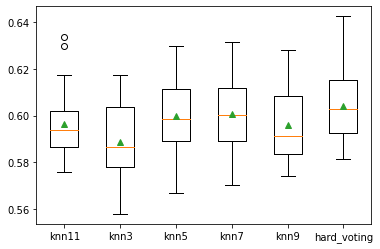

In [23]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
#from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    array = after_imputation.values
    X = array[:,1:105]
    y = array[:,105]
    return X, y

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn11', KNeighborsClassifier(n_neighbors=11)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>svm1 0.592 (0.003)
>svm2 0.617 (0.012)
>svm3 0.617 (0.014)
>svm4 0.618 (0.013)
>svm5 0.615 (0.015)
>soft_voting 0.618 (0.011)


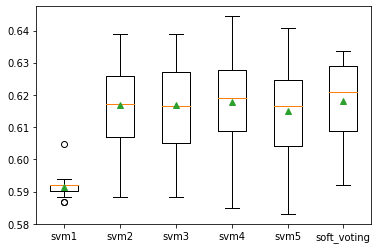

In [26]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    array = after_imputation.values
    X = array[:,1:105]
    y = array[:,105]
    return X, y

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
	models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
	models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
	models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
	models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble

# get a list of models to evaluate
def get_models():
	models = dict()
	models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
	models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
	models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
	models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
	models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
	models['soft_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, Y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.16%


In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 1.0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [16]:
print(best_clf)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....59970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_features=16,
                                                                n_estimators=30)],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'class

In [4]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
array = after_imputation.values
X = array[:,1:105]
y = array[:,105]
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.621661 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.615162 (0.016546) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.613057 (0.018298) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.618472 (0.015496) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.613297 (0.015782) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.612876 (0.017672) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.619073 (0.015580) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.610770 (0.014888) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.613117 (0.018380) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.619314 (0.013406) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.612756 (0.015630) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.612395 (0.018378) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.621360 (0.013529) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.614440 (0.015878) wi

In [19]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
array = after_imputation.values
X = array[:,1:105]
y = array[:,105]
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.702647 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.648857 (0.021147) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.695367 (0.013080) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.702647 (0.014121) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.640072 (0.018281) with: {'max_features': 'log2', 'n_estimators': 10}
0.671119 (0.015319) with: {'max_features': 'log2', 'n_estimators': 100}
0.682611 (0.013897) with: {'max_features': 'log2', 'n_estimators': 1000}


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

array = after_imputation.values
X = array[:,1:105]
y = array[:,105]

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X  = min_max_scaler.fit_transform(X)



clf1 = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'liblinear')
clf2 = RandomForestClassifier(max_features = 'sqrt', n_estimators= 1000)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.59 (+/- 0.00) [Logistic Regression]
Accuracy: 0.60 (+/- 0.01) [Random Forest]
Accuracy: 0.51 (+/- 0.02) [naive Bayes]
Accuracy: 0.60 (+/- 0.01) [Ensemble]


In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
array = after_imputation.values
X = array[:,1:105]
y = array[:,105]
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [18]:

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
array = after_imputation.values
X = array[:,1:105]
y = array[:,105]
# define models and parameters
modell = LogisticRegression(C= 0.01, penalty ='l2', solver= 'liblinear').fit(X,y)
#modell.fit(X, y)
print(modell.classes_)
print(modell.predict(X))
print(modell.score(X, y))
print(confusion_matrix(y, modell.predict(X)))

[0. 2. 3.]
[0. 0. 0. ... 0. 0. 0.]
0.636101083032491
[[2705  548   24]
 [ 973  806    0]
 [ 471    0   13]]


In [ ]:
############ Check if binary (score or no score)

In [2]:
switch_bin = pd.read_csv(r'D:\Szakdolgozat_data\Features_jupyter\after_imputation.csv')
switch_bin

,Unnamed: 0.1,Unnamed: 0,SHOT_DISTANCE,2P%,3P%,True Shooting,CLOSEST_DEFENDER_DIST,On_ball_defender_dist_to_ball,Screener_defender_dist_to_ball,On_ball_defender_dist_to_ball_plus25,...,FG%_P9,% of shots 3P_P9,2P%_P9,3P%_P9,True Shooting_P9,FG%_P10,2P%_P10,3P%_P10,True Shooting_P10,points_scored
0,0,0,13.0,0.487,0.358,0.520,2.588160,13.555883,22.978021,12.698297,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
1,1,1,12.0,0.513,0.356,0.565,5.626314,13.924417,25.712309,21.429576,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
2,2,2,8.0,0.449,0.345,0.501,2.137450,16.916208,27.552834,10.159932,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,2.0
3,3,3,20.0,0.547,0.306,0.563,5.997132,15.362563,15.757765,12.552773,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
4,4,4,8.0,0.515,0.000,0.504,2.367214,11.087272,19.341080,10.466913,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,5535,5535,24.0,0.534,0.366,0.569,9.475067,15.152548,15.761466,11.801533,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,3.0
5536,5536,5536,2.0,0.515,0.281,0.557,2.385489,24.708539,29.008397,10.646605,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,2.0
5537,5537,5537,2.0,0.515,0.281,0.557,2.385489,11.365732,14.854601,3.781121,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,2.0
5538,5538,5538,28.0,0.477,0.299,0.511,5.055592,18.248456,23.793854,15.743521,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,0.0


In [3]:
switch_bin.loc[switch_bin["points_scored"] == 2, "points_scored"] = 1
switch_bin.loc[switch_bin["points_scored"] == 3, "points_scored"] = 1
switch_bin = switch_bin.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
switch_bin


,SHOT_DISTANCE,2P%,3P%,True Shooting,CLOSEST_DEFENDER_DIST,On_ball_defender_dist_to_ball,Screener_defender_dist_to_ball,On_ball_defender_dist_to_ball_plus25,Screener_defender_dist_to_ball_plus25,On_ball_defender_dist_to_ball_plus50,...,FG%_P9,% of shots 3P_P9,2P%_P9,3P%_P9,True Shooting_P9,FG%_P10,2P%_P10,3P%_P10,True Shooting_P10,points_scored
0,13.0,0.487,0.358,0.520,2.588160,13.555883,22.978021,12.698297,13.412343,13.853308,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,1.0
1,12.0,0.513,0.356,0.565,5.626314,13.924417,25.712309,21.429576,24.238137,14.766693,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,1.0
2,8.0,0.449,0.345,0.501,2.137450,16.916208,27.552834,10.159932,23.269165,12.258086,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,1.0
3,20.0,0.547,0.306,0.563,5.997132,15.362563,15.757765,12.552773,17.313770,11.775084,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
4,8.0,0.515,0.000,0.504,2.367214,11.087272,19.341080,10.466913,14.005443,13.787012,...,0.401,0.457,0.449,0.345,0.501,0.514,0.515,0.000,0.504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,24.0,0.534,0.366,0.569,9.475067,15.152548,15.761466,11.801533,13.173314,0.785309,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,1.0
5536,2.0,0.515,0.281,0.557,2.385489,24.708539,29.008397,10.646605,10.804462,11.102879,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,1.0
5537,2.0,0.515,0.281,0.557,2.385489,11.365732,14.854601,3.781121,4.230706,1.466796,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,1.0
5538,28.0,0.477,0.299,0.511,5.055592,18.248456,23.793854,15.743521,16.558619,10.075679,...,0.514,0.002,0.515,0.000,0.504,0.353,0.398,0.292,0.436,0.0


In [8]:
list(switch_bin.columns)

['SHOT_DISTANCE',
 '2P%',
 '3P%',
 'True Shooting',
 'CLOSEST_DEFENDER_DIST',
 'On_ball_defender_dist_to_ball',
 'Screener_defender_dist_to_ball',
 'On_ball_defender_dist_to_ball_plus25',
 'Screener_defender_dist_to_ball_plus25',
 'On_ball_defender_dist_to_ball_plus50',
 'Screener_defender_dist_to_ball_plus50',
 'Closest_def_to_first_OP',
 'Closest_def_to_second_OP',
 'Closest_def_to_third_OP',
 'Closest_def_to_fourth_OP',
 'Closest_def_to_fifth_OP',
 'Closest_def_to_first_OP_plus25',
 'Closest_def_to_second_OP_plus25',
 'Closest_def_to_third_OP_plus25',
 'Closest_def_to_fourth_OP_plus25',
 'Closest_def_to_fifth_OP_plus25',
 'Closest_def_to_first_OP_plus50',
 'Closest_def_to_second_OP_plus50',
 'Closest_def_to_third_OP_plus50',
 'Closest_def_to_fourth_OP_plus50',
 'Closest_def_to_fifth_OP_plus50',
 'P1_dist_to_basket',
 'P2_dist_to_basket',
 'P3_dist_to_basket',
 'P4_dist_to_basket',
 'P5_dist_to_basket',
 'P6_dist_to_basket',
 'P7_dist_to_basket',
 'P8_dist_to_basket',
 'P9_dist_to_ba

In [29]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
# define models and parameters
modell = LogisticRegression(C= 0.01, penalty ='l2', solver= 'liblinear').fit(X,y)
#modell.fit(X, y)
print(modell.classes_)
print(modell.predict(X))
print(modell.score(X, y))
print(confusion_matrix(y, modell.predict(X)))
print(classification_report(y, modell.predict(X)))

[0. 1.]
[0. 0. 0. ... 0. 0. 0.]
0.6337545126353791
[[2778  499]
 [1530  733]]
              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73      3277
         1.0       0.59      0.32      0.42      2263

    accuracy                           0.63      5540
   macro avg       0.62      0.59      0.58      5540
weighted avg       0.62      0.63      0.60      5540



In [26]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.705415 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.645848 (0.019111) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.696330 (0.016350) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.705415 (0.014815) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.639230 (0.019656) with: {'max_features': 'log2', 'n_estimators': 10}
0.685499 (0.015057) with: {'max_features': 'log2', 'n_estimators': 100}
0.698436 (0.014642) with: {'max_features': 'log2', 'n_estimators': 1000}


In [8]:
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
# define models and parameters
modell = RandomForestClassifier(max_features = 'sqrt', n_estimators = 1).fit(X,y)
#modell.fit(X, y)
print(modell.classes_)
print(modell.predict(X))
print(modell.score(X, y))
print(confusion_matrix(y, modell.predict(X)))
print(classification_report(y, modell.predict(X)))

[0. 1.]
[1. 1. 0. ... 0. 0. 0.]
0.8346570397111913
[[2818  459]
 [ 457 1806]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3277
         1.0       0.80      0.80      0.80      2263

    accuracy                           0.83      5540
   macro avg       0.83      0.83      0.83      5540
weighted avg       0.83      0.83      0.83      5540



C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


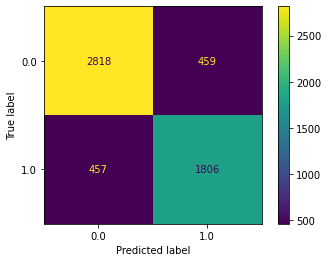

In [14]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modell, X, y)  
plt.show()

0.6866425992779783
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       804
         1.0       0.75      0.38      0.51       581

    accuracy                           0.69      1385
   macro avg       0.71      0.64      0.64      1385
weighted avg       0.70      0.69      0.66      1385



C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


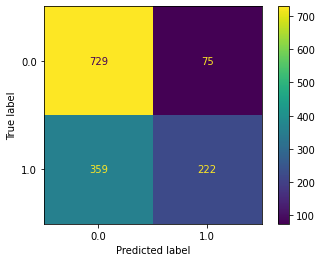

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
mod = RandomForestClassifier(max_features = 'sqrt', n_estimators = 1000,random_state = 1)
mod.fit(X_train, y_train)

print(mod.score(X_test, y_test))
print(classification_report(y_test, mod.predict(X_test)))
plot_confusion_matrix(mod, X_test, y_test)  
plt.show()

In [5]:
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
mod = RandomForestClassifier(max_features = 'sqrt', n_estimators = 1000,random_state = 1)
mod.fit(X_train, y_train)

print(mod.score(X_test, y_test))
print(classification_report(y_test, mod.predict(X_test)))
#plot_confusion_matrix(mod, X_test, y_test)  
#plt.show()

0.6866425992779783
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       804
         1.0       0.75      0.38      0.51       581

    accuracy                           0.69      1385
   macro avg       0.71      0.64      0.64      1385
weighted avg       0.70      0.69      0.66      1385



C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


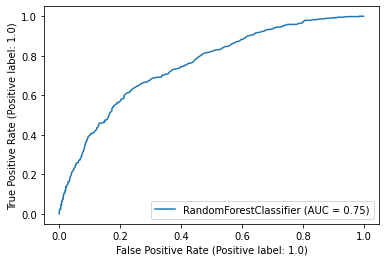

In [5]:
metrics.plot_roc_curve(mod, X_test, y_test) 
plt.show()

In [7]:
import time
import numpy as np
from matplotlib.pyplot import figure



start_time = time.time()
importances = mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in mod.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.341 seconds


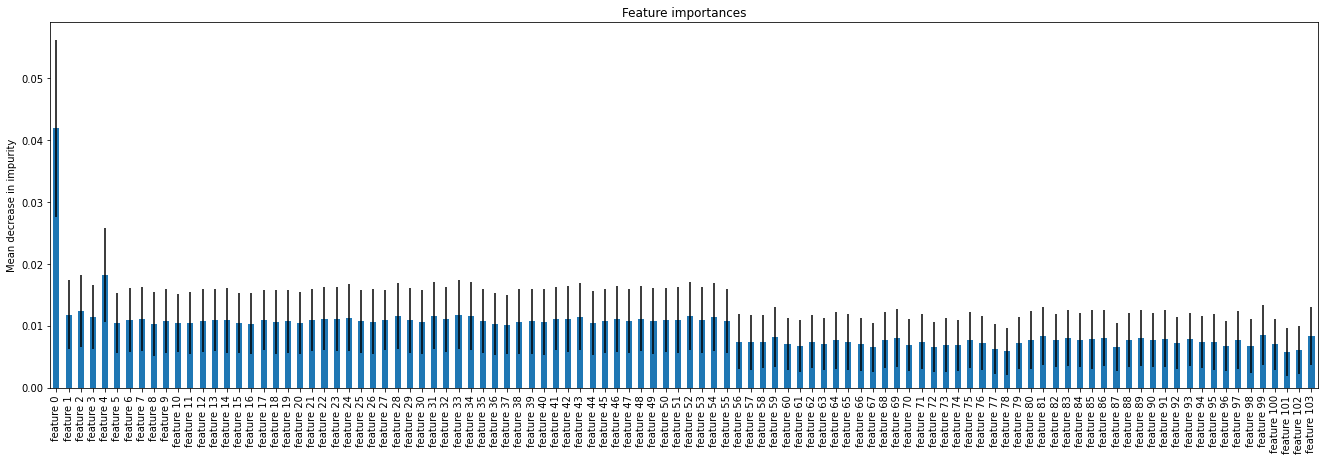

In [10]:
feature_names = [f"feature {i}" for i in range (X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(18.5, 6.5)
fig.tight_layout()

0.5927797833935018
              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73      3277
         1.0       0.58      0.32      0.42      2263

    accuracy                           0.63      5540
   macro avg       0.61      0.58      0.57      5540
weighted avg       0.62      0.63      0.60      5540



C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


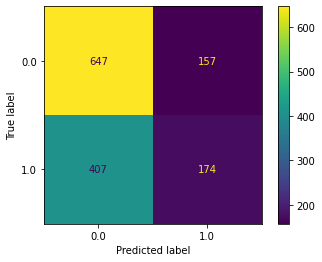

In [43]:
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
modx = LogisticRegression(C= 0.1, penalty ='l2', solver= 'liblinear',ran)
modx.fit(X_train, y_train)

print(modx.score(X_test, y_test))
#print(confusion_matrix(y, modx.predict(X)))
print(classification_report(y, modx.predict(X)))
plot_confusion_matrix(modx, X_test, y_test)  
plt.show()

0.6779783393501805
[[3130  147]
 [ 299 1964]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      3277
         1.0       0.93      0.87      0.90      2263

    accuracy                           0.92      5540
   macro avg       0.92      0.91      0.92      5540
weighted avg       0.92      0.92      0.92      5540



C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


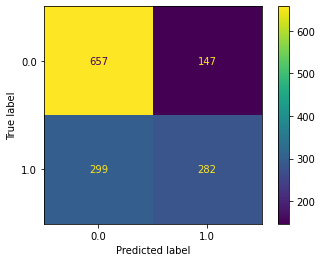

In [38]:
from xgboost import XGBClassifier
bin_array = switch_bin.values
X = bin_array[:,0:104]
y = bin_array[:,104]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
modx = XGBClassifier()
modx.fit(X_train, y_train)

print(modx.score(X_test, y_test))
print(confusion_matrix(y, modx.predict(X)))
print(classification_report(y, modx.predict(X)))
plot_confusion_matrix(modx, X_test, y_test)  
plt.show()

In [ ]:
############

In [7]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.719 (0.046)


>9 0.677 (0.040)


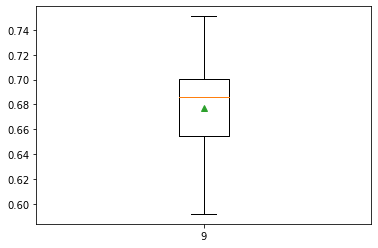

In [7]:
#Exploring the number of features
#models to evaluate
def get_models():
    models = dict()
    for i in range(1, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate the given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# defining the dataset
X, y = X,Y
# get the models to evaluate
models = get_models()
# evaluate the models and get the results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot the performance of the models
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [4]:
#alt rfe

rfecv = RFECV(estimator=DecisionTreeClassifier(), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

In [5]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 3


C:\Users\Acer\anaconda3\envs\pythonProject3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


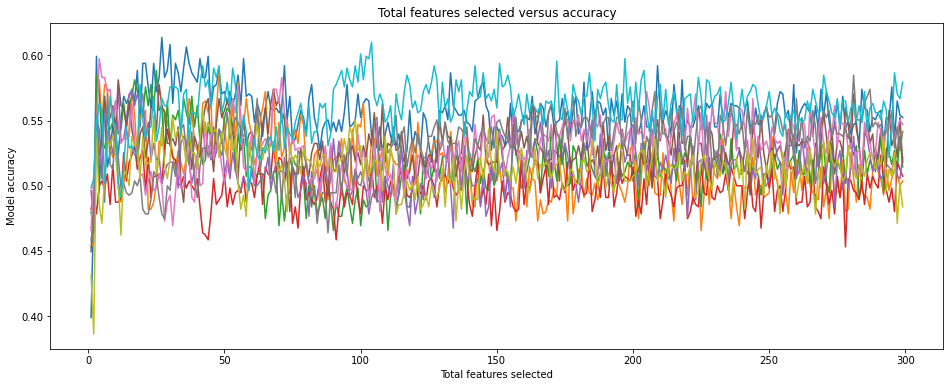

In [10]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()